# 3. 신경망 (Neural Network)
- 퍼셉트론으로 복잡한 함수도 표현 가능
- 다만, 가중치를 설정하는 작업은 수동으로 해야 함
- 신경망을 통해 해결 가능

## 3.1 퍼셉트론에서 신경망으로
### 3.1.1 신경망의 예
입력층 -> 은닉층 -> 출력층

### 3.1.2 퍼셉트론
$$
y = \{
\begin{align}
0 \ (b+w_1 x_1 + w_2 x_2 \leq 0) \\
1 \ (b+w_1 x_1 + w_2 x_2 > 0)
\end{align}
$$

위 식을, 간결한 형태로 변경하면

$$
y = h(b+w_1 x_1 + w_2 x_2)
\\
h(x) = \{
\begin{align} 
0 \ (x \leq 0)\\
1 \ (x > 0)
\end{align}
$$

- 입력 신호의 총합이 `h(x)`를 거쳐 변환

### 3.1.3 활성화 함수의 등장
- 신호의 총합을 출력 신호로 변환하는 함수, 활성화 함수(activation function)
- (b + w1x1 + w2x2) -> a -> h(a) -> y

## 3.2 활성화 함수
- 임계값을 경계로 출력이 바뀜 -> 계단 함수(step function)
- 활성 함수를 계단 함수에더 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠

### 3.2.1 시그모이드 함수 (sigmoid function)
$$
h(x) = {1 \over 1 + exp(-x)}
$$

### 3.2.2 계단 함수 구현하기

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def step_function(x):
    if x>0: return 1
    else: return 0
    
# 배열도 지원하는 경우
def step_function(x):
    y = x > 0
    return y.astype(int)

In [3]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x > 0
y

array([False,  True,  True])

In [5]:
y.astype(int)

array([0, 1, 1])

### 3.2.3 계단 함수의 그래프

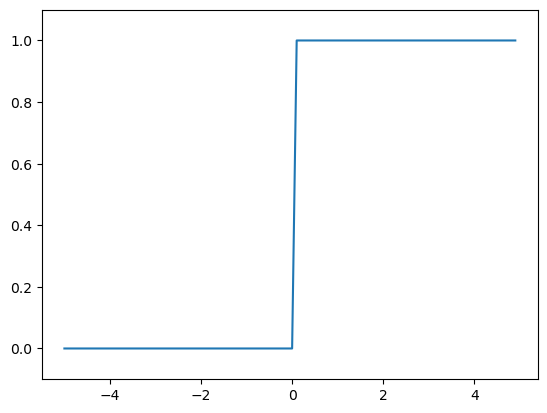

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

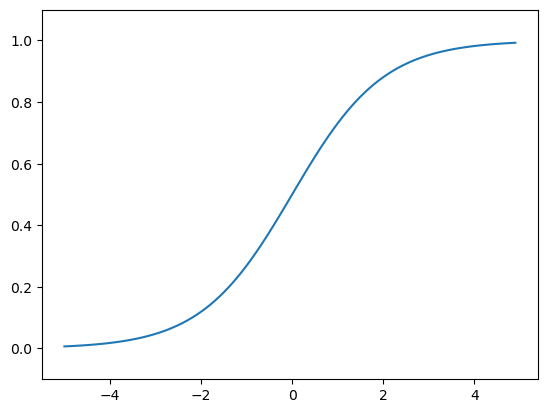

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

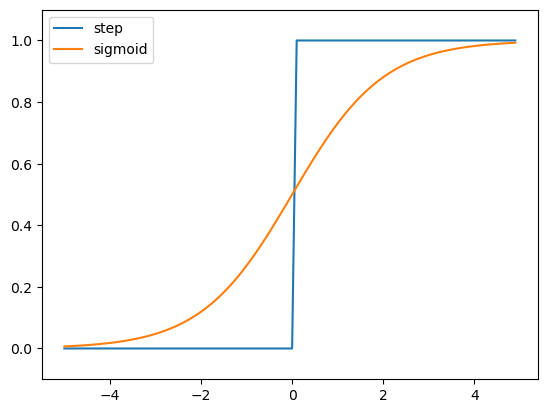

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, step_function(x), label="step")
plt.plot(x, sigmoid(x), label="sigmoid")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

### 3.2.6 비선형 함수
- $f(x) = ax + b$는 선형 함수라하고,
- 이외의 함수 꼴은 비선형 함수가 됨
- 신경망에서 선형 함수를 사용하면, 신경망을 깊게 만드는 의미가 없어짐
  - $h(x) = cx$
  - 3-layer nn -> h(h(h(x))) -> c * c * c * x = $c^3x$
  - 은닉층을 사용할 필요가 없어짐

### 3.2.7 ReLU 함수
- Rectified Linear Unit
$$
h(x) = \{
\begin{align}
{x \ (x > 0)} \\
{0 \ (x \leq 0)}
\end{align}
$$  

In [11]:
def relu(x):
    return np.maximum(0, x)

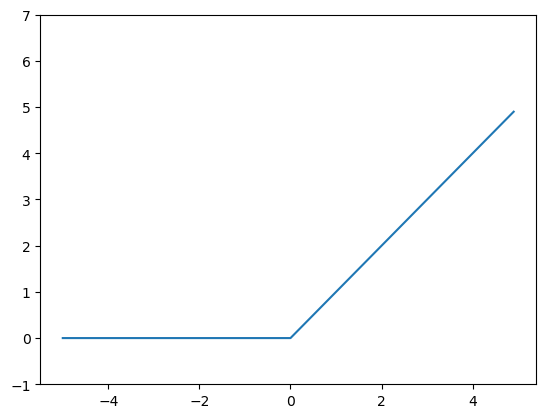

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 7)
plt.show()

## 3.3 다차원 배열의 계산
- 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있음

### 3.3.1 다차원 배열

In [13]:
# 1차원
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [14]:
A.shape

(4,)

In [15]:
A.ndim, np.ndim(A)

(1, 1)

In [16]:
# 2차원
B = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

print(B)

[[1 2]
 [3 4]
 [5 6]]


In [17]:
B.shape, B.ndim

((3, 2), 2)

### 3.3.2 행렬의 내적(행렬 곱)

In [18]:
A = np.array([
    [1, 2],
    [3, 4]
])
print(A.shape)

B = np.array([
    [5, 6],
    [7, 8]
])
print(B.shape)

(2, 2)
(2, 2)


In [19]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [20]:
A.dot(B)

array([[19, 22],
       [43, 50]])

In [21]:
# (2*3) (3*2)
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
print(A.shape)

B = np.array([
  [1, 2],
  [3, 4],
  [5, 6]  
])
print(B.shape)

(2, 3)
(3, 2)


In [22]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

다차원 배열을 곱하려면, 두 행렬의 대응하는 차원의 원소 수를 일치 시켜야 함

### 3.3.3 신경망의 내적

In [23]:
X = np.array([1, 2])
W = np.array([
    [1, 3, 5],
    [2, 4, 6]
])

print(X.shape, W.shape)

(2,) (2, 3)


In [24]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

## 3.4 3층 신경망 구현하기
- 입력부터 출력까지의 처리 (순방향 처리) 구현

### 3.4.1 표기법 설명
- 신경망의 계산을 행렬 계산으로 정리 가능
- $w^{layer}_{n, p}$
  - layer층의 가중치
  - 다음 층의 n 번째 뉴런
  - 전 층의 p 번째 뉴런
  - $w^{(1)}_{1 \ 2}$ -> 2번째 뉴런에서 1번째 뉴런으로 가는 1층의 가중치

### 3.4.2 각 층의 신호 전달 구현하기
- $a^{(1)}_1 = w^{(1)}_{1, 1} x_1 + w^{(2)}_{1, 2} x_2 + b^{(1)}_1$
- 위 식에 행렬 적용시, $A^{(1)} = XW^{(1)} + B^{(1)}$
- $A^{(1)} = (a^{(1)}_1, a^{(1)}_2, a^{(1)}_3)$
- $X = (x_1, x_2)$
- $B^{(1)} = (b^{(1)}_1, b^{(1)}_2, b^{(1)}_3)$
- $W^{(1)} = \begin{pmatrix} w^{(1)}_{1, 1} & w^{(1)}_{2, 1} & w^{(1)}_{3, 1} \\ w^{(1)}_{1, 2} & w^{(1)}_{2, 2} & w^{(1)}_{3, 2} \end{pmatrix}$

In [25]:
# Input -> Hidden Layer 1
X = np.array([1.0, 0.5])
W1 = np.array([
    [0.1, 0.3, 0.5],
    [0.2, 0.4, 0.6]
])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [26]:
A1

array([0.3, 0.7, 1.1])

In [27]:
# 활성 함수 적용 Z
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [28]:
# Hidden Layer 1 -> Hidden Layer 2
W2 = np.array([
    [0.1, 0.4],
    [0.2, 0.5],
    [0.3, 0.6]
])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [29]:
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [30]:
# 출력층 활성 함수
def identify_function(x):
    return x

W3 = np.array([
    [0.1, 0.3],
    [0.2, 0.4]
])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)

출력층의 활성 함수는 풀고자하는 문제의 성질에 맞게 정의해 사용,
- 회귀: 항등
- 이진 분류: 시그모이드
- 다중 분류: 소프트맥스

### 3.4.3 구현 정리

In [31]:
def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([0.1, 0.2])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)
    
    return y

In [32]:
network = init_network()
x = np.array([1.0, 5.0])
y = forward(network, x)

print(y)

[0.33098211 0.72778046]


## 3.5 출력층 설계하기
- 신경망은 분류와 회귀 모두에 이용 가능 (출력층에서 사용하는 활성 함수가 다름)

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
- 항등 함수(identity function)는 입력을 그대로 출력
- 소프트맥스(softmax)
  - $y_k = {exp(a_k) \over \sum^n_{i=1}exp(a_i)}$

In [33]:
def softmax(x):
    exp_a = np.exp(x)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

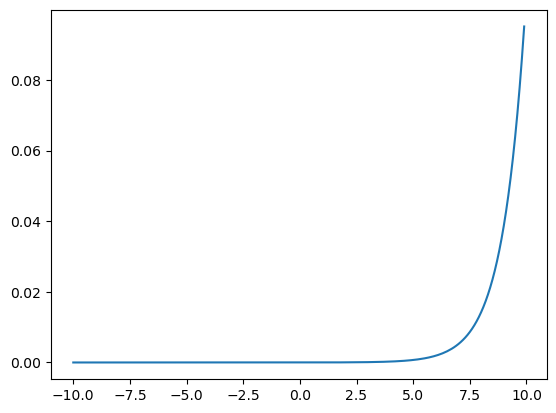

In [34]:
x = np.arange(-10, 10, 0.1)
y = softmax(x)
plt.plot(x, y)
plt.show()

### 3.5.2 소프트맥스 함수 구현 시 주의점
- 오버플로 문제가 발생 할 수 있음

#### 소프트맥스 함수 개선
$$
\begin{align}
y_k = {exp(a_k) \over \sum^n_{i=1}exp(a_i)} = {Cexp(a_k) \over C \sum^n_{i=1}exp(a_i)} \\
= {exp(a_k + logC) \over \sum^n_{i=1}exp(a_i + logC)} \\
= {exp(a_k+C') \over \sum^n_{i=1}exp(a_i+C')}
\end{align}
$$

- 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과에는 영향이 없음
- 오버플로를 막을 목적으로, 입력 신호 중 최댓값을 이용하는 것이 일반적

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
a = np.array([1010, 1000, 990])
# 소프트맥스 계산
softmax(a)

array([nan, nan, nan])

In [37]:
#  최댓값
c = np.max(a)
a - c

array([  0, -10, -20])

In [38]:
softmax(a-c)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [39]:
# 새로운 소프트맥스 함수
def softmax(x):
    c = np.max(x)
    exp_a = np.exp(x-c) # 오버플로 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 3.5.3 소프트맥스 함수의 특징


In [40]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


- 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수
- 출력의 총합은 1 (출력을 확률로 해석 가능하게하는 이유)

### Note!
- 기계학습의 문제 풀이는 학습과 추론의 두 단계로 이뤄짐
- 학습 단계에서는 모델을 학습(훈련)
- 추론 단계에서는 학습한 모델로 미지의 데이터에 대해 추론(분류) 수행

### 3.5.4 출력층의 뉴런 수 정하기
- 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 함

## 3.6 MNIST
- 추론 과정은, 순전파(forward propagation)라고도 함

### 3.6.1 MNIST 데이터셋